We will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=np.loadtxt(os.path.join('/content/drive/My Drive/Colab Notebooks/Andrew/Data','ex1data1.txt'),delimiter=',')

In [3]:
df=pd.DataFrame(data,columns=["population of a city (in 10,000s)","profit of a food truck in that city (in $10,000s)"])

In [4]:
df.head()

,"population of a city (in 10,000s)","profit of a food truck in that city (in $10,000s)"
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
df.shape

(97, 2)

In [6]:
df.columns

Index(['population of a city (in 10,000s)', 'profit of a food truck in that city (in $10,000s)'], dtype='object')

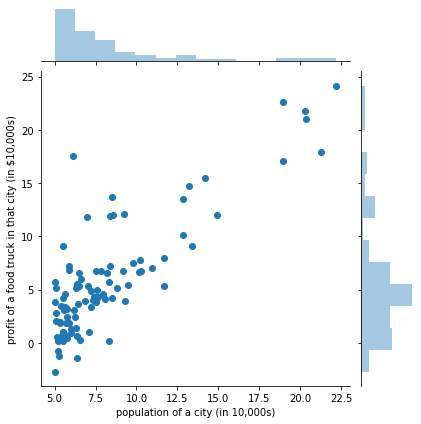

In [7]:
sns.jointplot(x='population of a city (in 10,000s)',y='profit of a food truck in that city (in $10,000s)',data=df)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df.drop('profit of a food truck in that city (in $10,000s)',axis=1)
y=df['profit of a food truck in that city (in $10,000s)']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
X_train.shape

(67, 1)

In [12]:
y_train.shape

(67,)

In [13]:
X_test.shape

(30, 1)

In [14]:
y_test.shape

(30,)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Support Vector Machine

In [16]:
from sklearn.svm import SVR


In [17]:
model=SVR()

In [18]:
model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
pred=model.predict(X_test)

In [27]:
y_pred=pd.DataFrame(pred,columns=['y_pred'])

In [28]:
y_pred.head()

,y_pred
0,4.362275
1,4.238841
2,6.159373
3,3.338203
4,7.211242


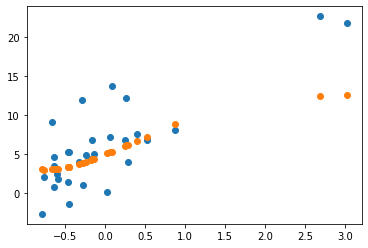

In [30]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,pred)

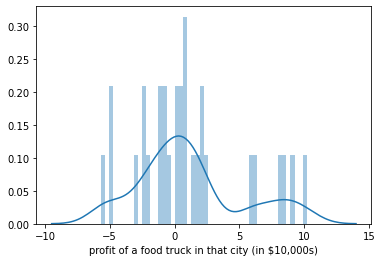

In [31]:
sns.distplot((y_test-pred),bins=50)

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.0159735465299886
MSE: 17.53016146055226
RMSE: 4.186903564754299


## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [36]:
y_pred=pd.DataFrame(pred,columns=['y_pred'])
y_pred.head()

,y_pred
0,5.116912
1,4.972520
2,7.062378
3,3.706389
4,8.160756


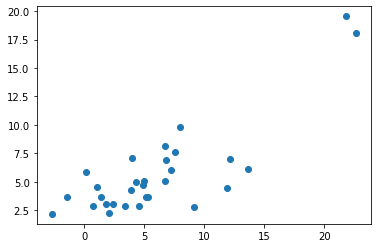

In [37]:
plt.scatter(y_test,pred)

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2.4999554242777218
MSE: 11.305525431571308
RMSE: 3.362369020730965


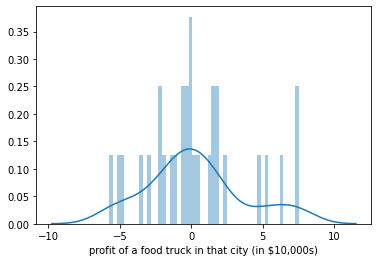

In [39]:
sns.distplot((y_test-pred),bins=50)

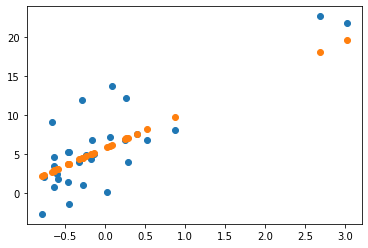

In [40]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,pred)